[0.09639807]
[[1.63891817e-06]]


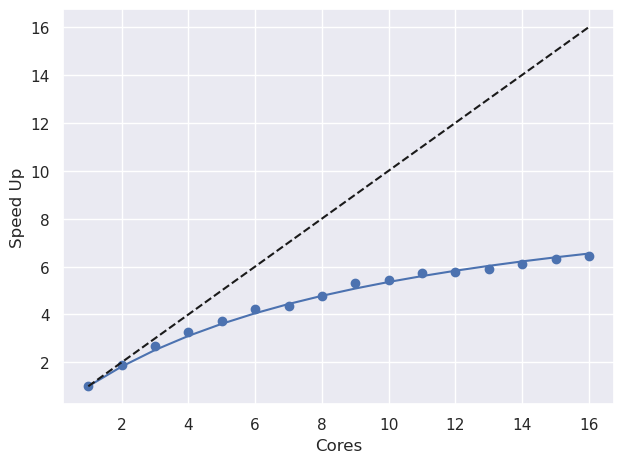

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def speed_up(P, f):
    return 1/(f + (1-f)/P)

sns.set_theme()

data = np.loadtxt("runtime.txt", skiprows=1)
cores = data[:,0]
real = data[:,1]
S = real[0]/real

popt, pcov = curve_fit(speed_up, cores[:], S[:])

print(popt)
print(pcov)

fig, ax = plt.subplots()
ax.scatter(cores, S)
ax.plot(cores, speed_up(cores,*popt))
ax.plot(cores, cores, linestyle='dashed', color='k')
ax.set_ylabel("Speed Up")
ax.set_xlabel("Cores")
fig.tight_layout()

plt.savefig("speedup.png")
plt.show()
